<a href="https://colab.research.google.com/github/Ayman-queen/data-science-internship-tasks/blob/main/Task5_Personal_Loan_Acceptance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7 non-null      int64 
 1   job        7 non-null      object
 2   marital    7 non-null      object
 3   education  7 non-null      object
 4   balance    7 non-null      int64 
 5   housing    7 non-null      object
 6   loan       7 non-null      object
 7   y          7 non-null      object
dtypes: int64(2), object(6)
memory usage: 580.0+ bytes
None

Marital Status:
 marital
single      3
married     3
divorced    1
Name: count, dtype: int64

Job Types:
 job
admin.         1
technician     1
management     1
services       1
student        1
blue-collar    1
retired        1
Name: count, dtype: int64


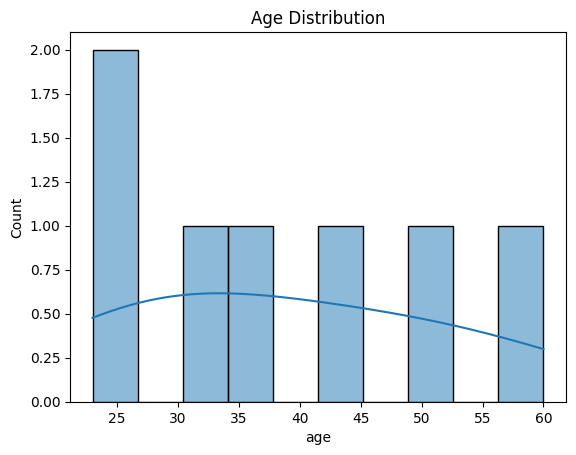

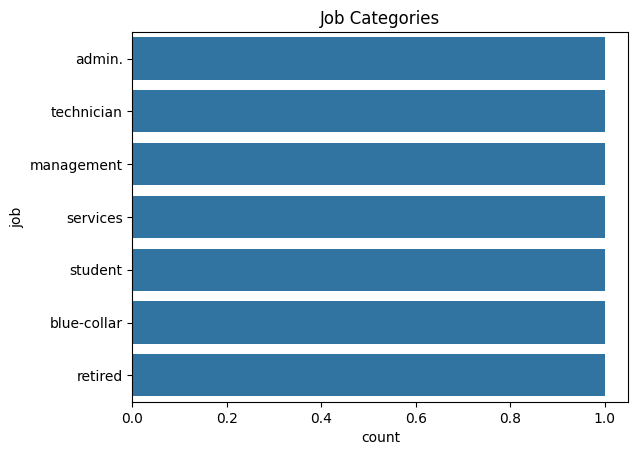

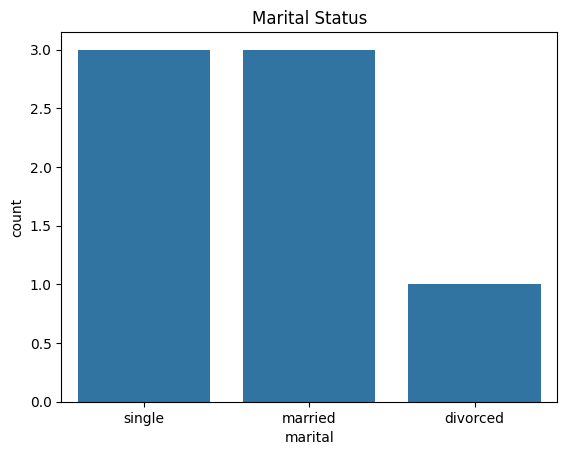


✅ Logistic Regression:
Accuracy: 0.6666666666666666
[[1 1]
 [0 1]]
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


✅ Decision Tree:
Accuracy: 0.6666666666666666
[[1 1]
 [0 1]]
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



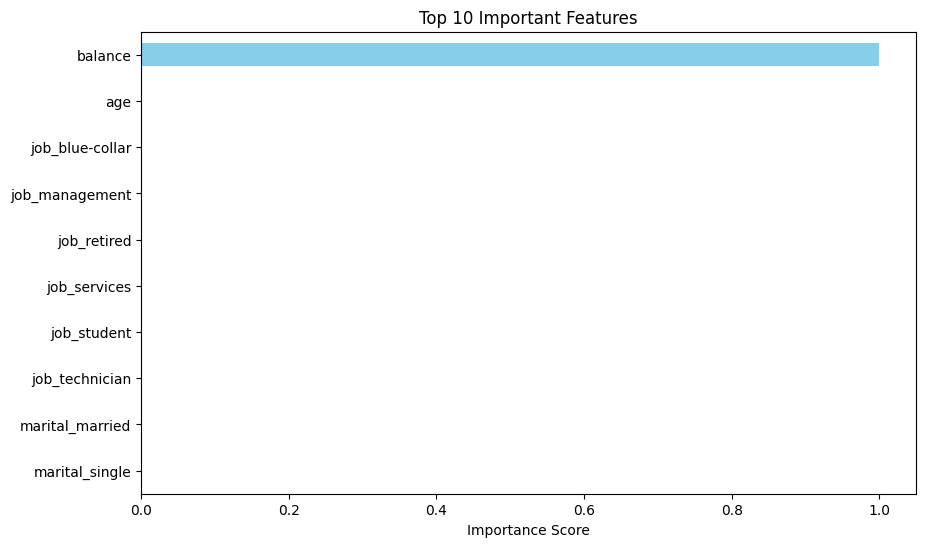

In [9]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Step 2: Sample Data (since full file not uploaded)
data = {
    'age': [25, 45, 35, 50, 23, 34, 60],
    'job': ['admin.', 'technician', 'management', 'services', 'student', 'blue-collar', 'retired'],
    'marital': ['single', 'married', 'single', 'divorced', 'single', 'married', 'married'],
    'education': ['tertiary', 'secondary', 'tertiary', 'secondary', 'primary', 'secondary', 'tertiary'],
    'balance': [1000, 500, 1200, 300, 100, 800, 1500],
    'housing': ['yes', 'no', 'yes', 'no', 'yes', 'yes', 'no'],
    'loan': ['no', 'yes', 'no', 'yes', 'no', 'no', 'yes'],
    'y': ['yes', 'no', 'yes', 'no', 'no', 'no', 'yes']
}
df = pd.DataFrame(data)

# ✅ Step 3: Basic Exploration
print(df.info())
print("\nMarital Status:\n", df['marital'].value_counts())
print("\nJob Types:\n", df['job'].value_counts())

# ✅ Step 4: Visualizations
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(y='job', data=df)
plt.title('Job Categories')
plt.show()

sns.countplot(x='marital', data=df)
plt.title('Marital Status')
plt.show()

# ✅ Step 5: One-Hot Encode Categorical Features
df_encoded = pd.get_dummies(df, drop_first=True)

# ✅ Step 6: Define Features and Target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# ✅ Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Step 8: Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n✅ Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# ✅ Step 9: Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n✅ Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# ✅ Step 10: Feature Importance Plot
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
important_features = feature_importance.sort_values(ascending=False).head(10)

important_features.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()